In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head().T

,0,1,2,3,4
v1,ham,ham,spam,ham,ham
v2,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro..."
Unnamed: 2,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [ ]:
df = df[['v1','v2']]
df.columns = ['label','message']
df.head().T

,0,1,2,3,4
label,ham,ham,spam,ham,ham
message,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro..."


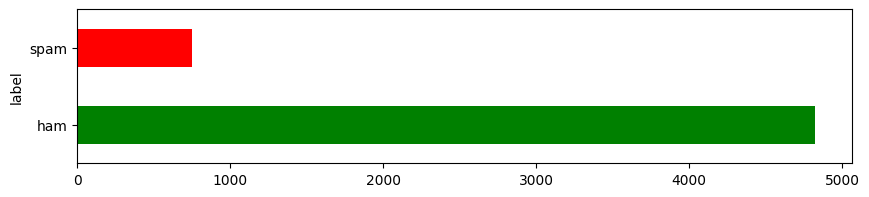

In [ ]:
# Visualize the distribution of spam and ham messages
plt.figure(figsize=(10, 2))
df['label'].value_counts().plot(kind='barh',color=['green','red'])
plt.title = 'Distribution of Spam vs Ham'
plt.xlabel = 'Label'
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define a function to preprocess text data
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]','',text)
  text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
  return text

In [ ]:
df['processed_message'] = df['message'].apply(preprocess_text)
df.head().T

,0,1,2,3,4
label,ham,ham,spam,ham,ham
message,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro..."
processed_message,go jurong point crazi avail bugi n great world...,ok lar joke wif u oni,free entri 2 wkli comp win fa cup final tkt 21...,u dun say earli hor u c alreadi say,nah dont think goe usf live around though


In [ ]:
X = df['processed_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text messagesinto numericalfeatures using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



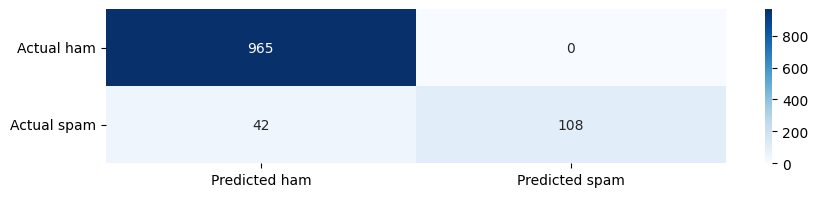

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted ham', 'Predicted spam'],
            yticklabels=['Actual ham', 'Actual spam'])
plt.show()

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validation Score: 0.9505502815518121
Test Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



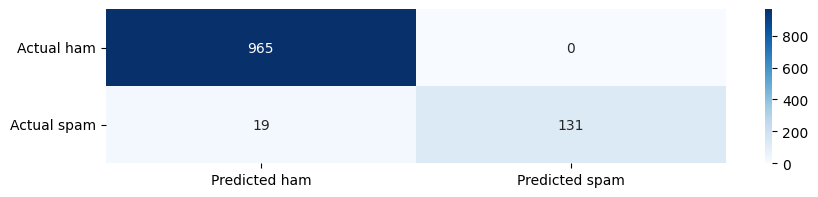

In [ ]:

# Tiuning parameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}

# Using GridSearchCV for tiuning the model
grid_search = GridSearchCV(estimator=nb_classifier,
                           param_grid=param_grid, cv=5,
                           scoring='f1_macro', n_jobs=-1)


# Fit the GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted ham', 'Predicted spam'],
            yticklabels=['Actual ham', 'Actual spam'])
plt.show()